<a href="https://colab.research.google.com/github/makifnawab/ASSIGNMENT-/blob/main/project_%3D_sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import numpy as np

# Try reading the CSV file with 'latin-1' encoding
try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
except UnicodeDecodeError:
    # If 'latin-1' doesn't work, try 'ISO-8859-1'
    try:
        df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        # If other encodings fail, you might need to investigate the file's actual encoding
        print("Could not decode the file with common encodings. Please check the file's encoding.")
    except FileNotFoundError:
         print("Error: 'spam.csv' not found. Please make sure the file is in the correct directory.")

# You can display the first few rows to verify if it loaded correctly
# display(df.head())

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1470,ham,Take some small dose tablet for fever,NaN,NaN,NaN
2560,ham,Are you still getting the goods.,NaN,NaN,NaN
4105,ham,K then 2marrow are you coming to class.,NaN,NaN,NaN
2523,ham,"Sorry, I'll call later",NaN,NaN,NaN
2385,spam,Someone has contacted our dating service and e...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# 1.Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.sample(5)

,v1,v2
1629,ham,Sounds like you have many talents! would you l...
3518,ham,Hanging out with my brother and his family
4535,ham,Never blame a day in ur life. Good days give u...
2145,spam,Sunshine Hols. To claim ur med holiday send a ...
1839,ham,Are we doing the norm tomorrow? I finish just ...


In [ ]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
4561,ham,How much u trying to get?
4855,ham,yes baby! I need to stretch open your pussy!
2067,ham,Who's there say hi to our drugdealer
5317,ham,"K, fyi I'm back in my parents' place in south ..."
5382,ham,"I can make it up there, squeezed &lt;#&gt; b..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#missing values

In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.shape

(5169, 2)

# 2.EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["target"].value_counts()

,count
target,
0,4516
1,653


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

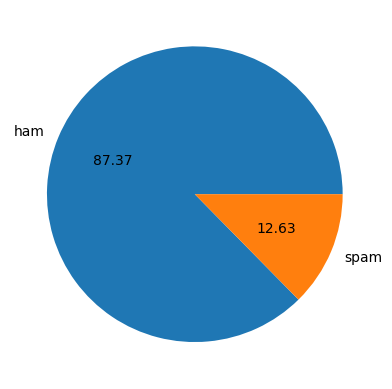

In [ ]:
plt.pie(df["target"].value_counts(), labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [ ]:
#data is imbalanced

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df["num_char"] = df['text'].apply(len)

In [ ]:
df['text'].apply(len)

,text
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [ ]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
from nltk.tokenize import word_tokenize


In [ ]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
#ham
df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

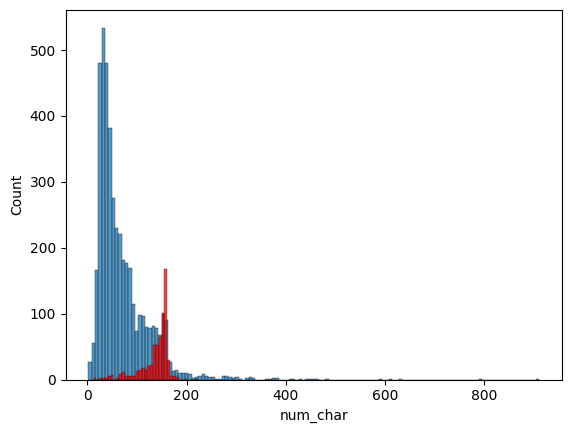

In [ ]:
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

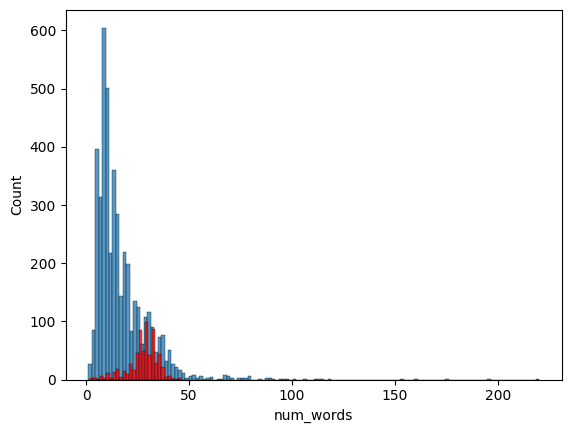

In [ ]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

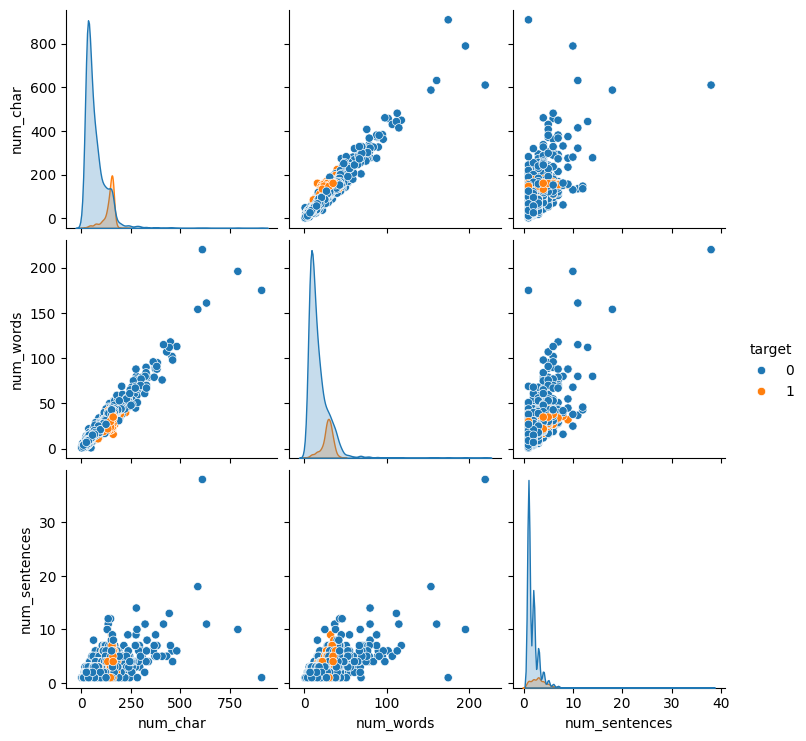

In [ ]:
sns.pairplot(df, hue='target')
#

<Axes: >

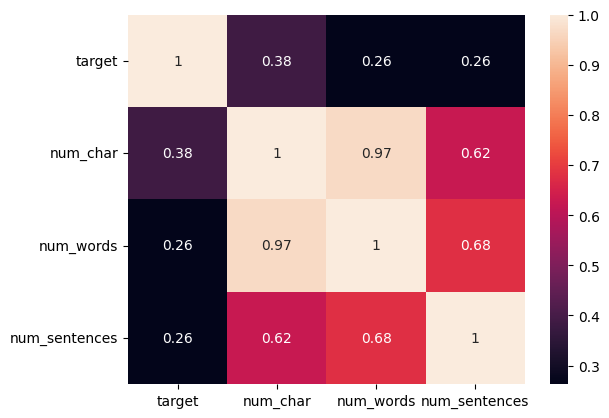

In [ ]:
sns.heatmap(df[['target', 'num_char', 'num_words', 'num_sentences']].corr(), annot=True)

# DATA PREPROCESSING
**1. LOWER CASE**

**2. TOKENIZTION**

**3. REMOVING SPECIAL CHARACTERS**

**4. REMOVING STOP WORDS AND PUNCTUATION**

**5. STEMMING**

In [ ]:
import nltk
nltk.download('stopwords')
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text('i love machine learning lectures in youtube what about you?')

'love machin learn lectur youtub'

In [ ]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [ ]:
transform_text(df['text'][2000])

'b go 2 sch mon si need 2 take smth'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
ps.stem('dansing')

'dans'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)
#

In [ ]:
df['transformed_text']

,transformed_text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [ ]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1] ['transformed_text'].str.cat(sep=" "))

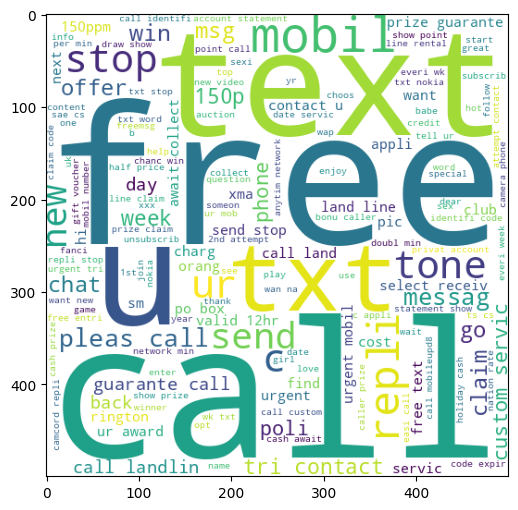

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [ ]:
ham_wc = wc.generate(df[df['target'] == 0] ['transformed_text'].str.cat(sep=" "))

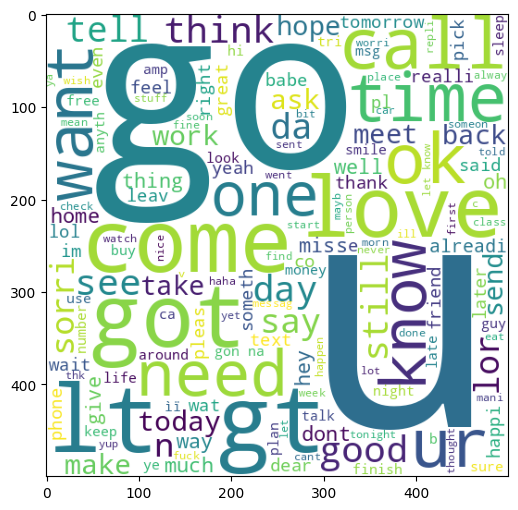

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
#

In [ ]:
from collections import Counter

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Get the top 50 most common words in spam messages
top_50_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
display(top_50_spam_words)

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


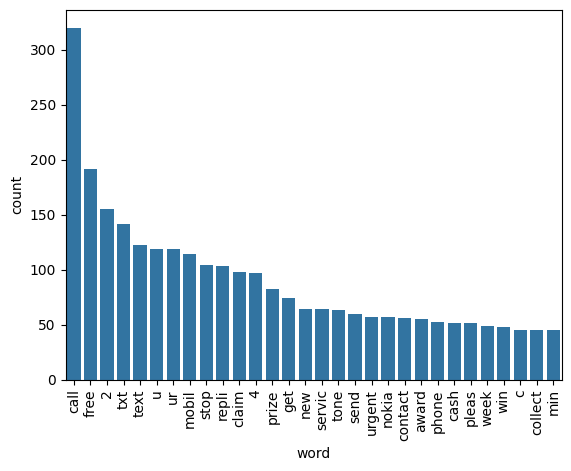

In [ ]:
sns.barplot(x='word', y='count', data=top_50_spam_words)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from collections import Counter

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
      ham_corpus.append(word)

# Get the top 50 most common words in spam messages
top_50_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
display(top_50_ham_words)

,word,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


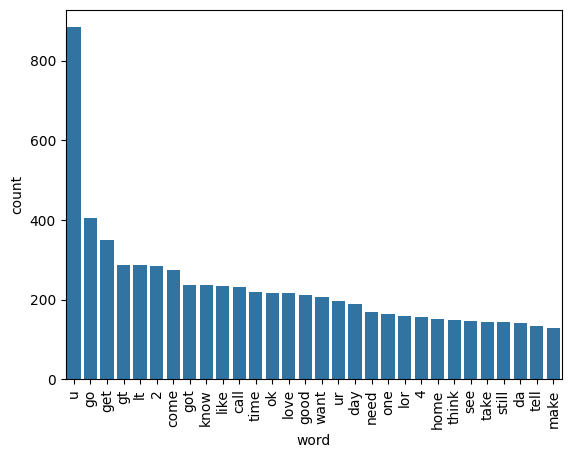

In [ ]:
sns.barplot(x='word', y='count', data=top_50_ham_words)
plt.xticks(rotation=90)
plt.show()

# model building

In [ ]:
#text vectorization
# using bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
#

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [ ]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
x.shape

(5169, 3000)

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
#

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
GNB = gnb.fit(x_train,y_train)
y_pred1 = GNB.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [ ]:
MNB = mnb.fit(x_train,y_train)
y_pred2 = MNB.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
BNB = bnb.fit(x_train,y_train)
y_pred3 = BNB.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

#

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
#tfidf -> MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
ect = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': ect,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
  print("for ", name)
  print("accuracy - ", current_accuracy)
  print("precision - ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for  SVC
accuracy -  0.9758220502901354
precision -  0.9747899159663865
for  KN
accuracy -  0.9052224371373307
precision -  1.0
for  NB
accuracy -  0.9709864603481625
precision -  1.0
for  DT
accuracy -  0.9313346228239845
precision -  0.8383838383838383
for  LR
accuracy -  0.9555125725338491
precision -  0.96
for  RF
accuracy -  0.9738878143133463
precision -  0.9826086956521739
for  AdaBoost
accuracy -  0.9216634429400387
precision -  0.8202247191011236
for  BgC
accuracy -  0.9584139264990329
precision -  0.8682170542635659
for  ETC
accuracy -  0.9748549323017408
precision -  0.9745762711864406
for  GBDT
accuracy -  0.9506769825918762
precision -  0.9306930693069307
for  xgb
accuracy -  0.965183752417795
precision -  0.9396551724137931


In [ ]:
performence_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values( 'Precision',ascending=False)

In [ ]:
performence_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.965184,0.939655
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.931335,0.838384


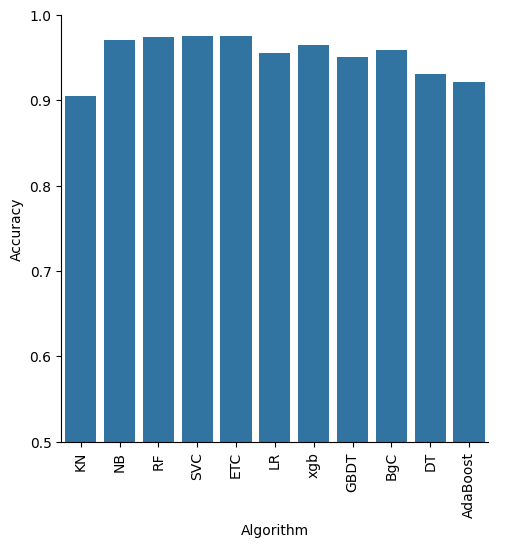

In [ ]:
sns.catplot(x = 'Algorithm', y = 'Accuracy', data = performence_df, kind = 'bar')
plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

# improving model

In [ ]:
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
ect = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', ect)], voting='soft')

In [ ]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
#voting.transform(x_test)

In [ ]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [ ]:
#applying staking
Estimators = [('svm', svc), ('nb', mnb), ('et', ect)]
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=Estimators, final_estimator=LogisticRegression())

In [ ]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))

Accuracy 0.9825918762088974
Precision 0.96875


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
from google.colab import files

files.download('vectorizer.pkl')
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>